In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Scenario

A company X has given out a dataset to their job candidate. Candidates job is to find meaning in the data with having no idea about what's data all about, because the company doesn't want to give away classified informations.

Here's how the data looks like:

In [2]:
data = pd.read_csv("data/knn_data")
data.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


As visible from above, the data points and column names don't tell us anything.

Because the kNN predicts the class of a given point by identifying points that are nearest to it, the scale of variables matters. Variables that are on a large scale will have a greater effect on the distance between observations than the variables on a small scale.

Due to that, we need to standardize the variables and to do that I will use `StandardScaler` from scikit-learn.

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data.drop("TARGET CLASS", axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [6]:
scaled_feat = scaler.transform(data.drop("TARGET CLASS", axis=1))
data_scaled = pd.DataFrame(scaled_feat, columns=data.columns[:-1])
data_scaled.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


Looks a lot better now when standardized. We've created a new DataFrame with the same columns but standardized, and dropped the last column which is not a feature column.

Now we can proceed and do a **train/test split**:

In [7]:
from sklearn.model_selection import train_test_split

X = scaled_feat
y = data["TARGET CLASS"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

## Finding the Right K value

It's not a easy task to find right K value for the data you don't have an idea what it represents.
To find it, I could iterate over some range of K values and see where the error is lowest:

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
error_rate = []

for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    prediction_i = knn.predict(X_test)
    error_rate.append(np.mean(prediction_i != y_test))

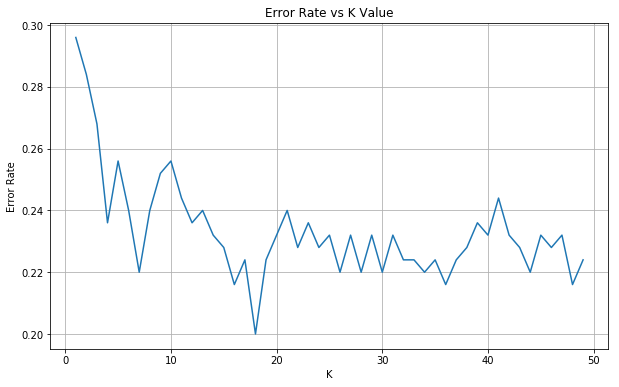

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 50), error_rate)
plt.title("Error Rate vs K Value")
plt.xlabel("K")
plt.ylabel("Error Rate")
plt.grid()

As visible, if I would just choose K to be 1 it would give out terrible results. From the graph above it seems like value of **18** has the lowest error:

In [12]:
knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=18, p=2,
           weights='uniform')

In [13]:
predictions = knn.predict(X_test)

In [14]:
from sklearn.metrics import classification_report

print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81       133
           1       0.79      0.78      0.78       117

   micro avg       0.80      0.80      0.80       250
   macro avg       0.80      0.80      0.80       250
weighted avg       0.80      0.80      0.80       250



Okay, 80% accuracy, not the best, but not the worst. Let's just see what would happend if I've chosen K to be 1:

In [16]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train, y_train)
predictions1 = knn1.predict(X_test)

print(classification_report(predictions1, y_test))

              precision    recall  f1-score   support

           0       0.69      0.74      0.72       125
           1       0.72      0.66      0.69       125

   micro avg       0.70      0.70      0.70       250
   macro avg       0.71      0.70      0.70       250
weighted avg       0.71      0.70      0.70       250



Accuracy drops by 10%. It was visible on the graph, but I wanted to implement it anyway.